In [1]:
import sys
sys.path.append('../src')

from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from group import Group
from agent import Agent
from utilities.tools import web_search

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create simulate tools
def search_filghts(distination:str, date:str):
    """
    search for flights and return a list of flights
    """
    mock_filghts = [
        {"airline": "Delta", "price": 200, "duration": "2 hours"},
        {"airline": "United", "price": 250, "duration": "2.5 hours"},
        {"airline": "American", "price": 300, "duration": "3 hours"},
    ]
    return mock_filghts

def booing_filght(airline:str):
    """
    book a flight and return a confirmation number
    """
    return "you have successfully booked a flight with {}.".format(airline)

def search_hotels(location:str, checkin:str, checkout:str):
    """
    search for hotels and return a list of hotels
    """
    mock_hotels = [
        {"hotel": "Hilton", "price": 100, "rating": 4},
        {"hotel": "Marriott", "price": 150, "rating": 4.5},
        {"hotel": "Hyatt", "price": 200, "rating": 5},
    ]
    return mock_hotels

def booking_hotel(hotel:str):
    """
    book a hotel and return a confirmation number
    """
    return "you have successfully booked a hotel with {}.".format(hotel)

def booking_ticket(activities:str):
    """
    book a ticket for activities or places to visit
    """
    return "you have successfully booked a ticket to {}.".format(activities)

def get_user_bugdet():
    """
    get the user budget
    """
    return 2000

def get_user_preferences():
    """
    get the user preferences
    """
    return "Usually stay in 5-star hotels and fly with United.I like cakes and cookies.and have a great interest in history and art."

# create an environment
env = Env(
    description="You are a group of travel agents helping customers with travel recommendations, bookings, and travel guides.",
    members=[

        Agent(name="travel_guide",
                role="Travel Guide",
                description="Transfer to me if you need help with travel guides.",
                persona="You are a travel guide who can provide travel guides like places to visit, things to do, etc.",
                tools=[web_search],
                model_client=model_client,
                verbose=True),

        Agent(name="booking_agent",
                role="Booking Agent",
                description="Transfer to me if you need help with booking like flights, hotels, etc.",
                persona="You are a booking agent who can help with booking like flights, hotels, etc. you can search for flights, hotels, book flights, hotels, and tickets for activities or places to visit.and then book them for the user without user's consent.",
                tools=[search_filghts, booing_filght, search_hotels, booking_hotel,booking_ticket],
                model_client=model_client,
                verbose=True),

        Agent(name="personal_assistant",
                role="Personal Assistant",
                description="Transfer to me if you need information about users like booking history, preferences, budget, etc. you can stand for the user and provide information and do decision-making on behalf of the user.",
                persona="You are a personal assistant who can provide information about users like booking history, preferences, budget, etc. and do decision-making on behalf of the user. you have access to user's bank account and can make transactions on behalf of the user.",
                tools=[get_user_bugdet, get_user_preferences],
                model_client=model_client,
                verbose=True),

        Agent(name="notification_agent",
                role="Notification Agent",
                description="Transfer to me if you need to send notifications to users like booking confirmation, reminders, etc.",
                persona="You are a notification agent who can help with notifications and send important information to users.",
                model_client=model_client,
                verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
# Image(g.draw_relations())

 
[2024-12-18 10:56:14][INFO]: All agents are fully connected
 
[2024-12-18 10:56:14][INFO]: Group initialized with ID 3028922a-288a-4432-b042-25fb53558bb8


In [3]:
_ = g.task("Please help me plan a 3-day trip to Shanghai starting on December 25, 2024. Arrange all the bookings and provide a travel guide for the trip.",
       model="gpt-4o-mini",
       model_for_planning = "gpt-4o",
       strategy="auto",
       with_plan_revise=False,
       with_in_transit_revise=False)

 
[2024-12-18 10:56:14][INFO]: Group Planner initialized (used for planning and managing group tasks)
 
[2024-12-18 10:56:14][INFO]: Start planning the task
 
[2024-12-18 10:56:18][INFO]: Planning finished
 
[2024-12-18 10:56:18][INFO]: Task: Please help me plan a 3-day trip to Shanghai starting on December 25, 2024. Arrange all the bookings and provide a travel guide for the trip.

Plan:
Step 1: personal_assistant
Gather user budget and preferences for the 3-day trip to Shanghai.
receive information from: []


Step 2: travel_guide
Research and prepare a travel guide for a 3-day trip to Shanghai, including local attractions, cultural experiences, and dining options.
receive information from: ['personal_assistant']


Step 3: booking_agent
Search and book flights to and from Shanghai from December 25, 2024, to December 28, 2024, based on user's preferences and budget.
receive information from: ['personal_assistant']


Step 4: booking_agent
Search and book a hotel in Shanghai from Decembe

### More

 
[2024-12-18 11:06:47][INFO]: All agents are fully connected
 
[2024-12-18 11:06:47][INFO]: Group initialized with ID ea1afc55-8df8-4023-85c4-03acd5ee6eb2


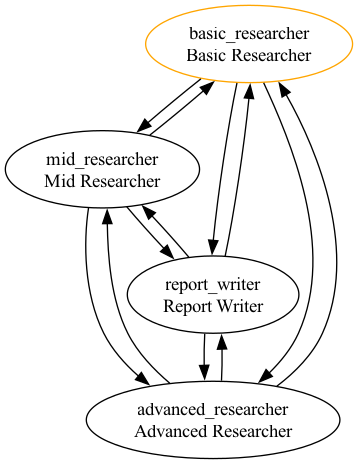

In [11]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are a group of researchers working on a project.Now is December 2024",
    members=[
        Agent(name="basic_researcher",
                role="Basic Researcher",
                description="Transfer to me if you need help with basic research or in the early stages of research.",
                persona="You are a basic researcher who can do basic research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="mid_researcher",
                role="Mid Researcher",
                description="Transfer to me if you have done some basic research and need help with mid-level research. ",
                persona="You are a mid-level researcher who can do mid-level research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="advanced_researcher",
                role="Advanced Researcher",
                description="Transfer to me if you have done some mid-level research and need help with advanced research.",
                persona="You are an advanced researcher who can do advanced research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="report_writer",
                  role="Report Writer",
                  description="Transfer to me if you need help with writing reports.",
                  persona="You are a report writer who can write reports on any topic.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [13]:
_ = g.task("Write a Report about LLM-based Multi-Agents System,include the history, development, popular framework, and applications,give me the final report.",
           model="gpt-4o-mini",
           model_for_planning = "gpt-4o-mini",
           strategy="auto",
           with_plan_revise=True,
           with_in_transit_revise=True)

 
[2024-12-18 11:06:57][INFO]: Start planning the task
 
[2024-12-18 11:07:00][INFO]: Planning finished
 
[2024-12-18 11:07:00][INFO]: Task: Write a Report about LLM-based Multi-Agents System,include the history, development, popular framework, and applications,give me the final report.

Plan:
Step 1: basic_researcher
Conduct basic research on the history of LLM-based Multi-Agent Systems and summarize key milestones.
receive information from: []


Step 2: mid_researcher
Research and outline the development of LLM-based Multi-Agent Systems, focusing on significant technological advancements.
receive information from: ['basic_researcher']


Step 3: advanced_researcher
Investigate popular frameworks for LLM-based Multi-Agent Systems, including their architectures and essential features.
receive information from: ['basic_researcher', 'mid_researcher']


Step 4: report_writer
Compile the gathered information into a cohesive report, covering history, development, frameworks, and applications

In [8]:
# # load the environment variables
# load_dotenv()
# # create a model client
# model_client = OpenAI()
# # create an environment
# env = Env(
#     description="You are entrepreneurs building a new product. Now is December 2024",
#     members=[
#         Agent(name = "designer",
#               role = "Designer", 
#               description = "Transfer to me if you need help with design.",
#               model_client = model_client,
#               verbose = True),

#         Agent(name="engineer",
#               role="Engineer",
#               description="Transfer to me if you need help with engineering.",
#               model_client=model_client,                
#               verbose=True),

#         Agent(name="researcher",
#                 role="Researcher",
#                 description="Transfer to me if you need help with research.",
#                 model_client=model_client,
#                 tools=[web_search],
#                 verbose=True),

#       Agent(name="product_manager",
#                   role="Product Manager",
#                   description="Transfer to me if you need help with product management.",
#                   model_client=model_client,
#                   verbose=True),
#     ]
# )
# # create a group of agents
# g = Group(env=env,model_client=model_client,verbose=True)
# # Image(g.draw_relations())

In [9]:
# _ = g.task("I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?",
#            model="gpt-4o-mini",
#            model_for_planning = "gpt-4o",
#            strategy="auto")